<a href="https://colab.research.google.com/github/rociocelestial/Challenge2-Data-Science/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [42]:
import requests
import pandas as pd

In [43]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
# Convertir el contenido en un diccionario de Python
data = response.json()
# Lo transformo con pandas, este diccionario en un DataFrame, pero esto no sirve
# por esto hacemos
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [44]:
# por esto hacemos pd.json_normalize(data)
df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformación

**Verificación**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

2.- Verificación de Valores Unicos

In [46]:
for col in df.columns:
  print(f"Valores unicos en la columna'{col}:{df[col].nunique()}'")

  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' *50)


Valores unicos en la columna'customerID:7267'
Valores unicos en la columna'Churn:3'
['No' 'Yes' '']
--------------------------------------------------
Valores unicos en la columna'customer.gender:2'
['Female' 'Male']
--------------------------------------------------
Valores unicos en la columna'customer.SeniorCitizen:2'
[0 1]
--------------------------------------------------
Valores unicos en la columna'customer.Partner:2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'customer.Dependents:2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'customer.tenure:73'
Valores unicos en la columna'phone.PhoneService:2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'phone.MultipleLines:3'
['No' 'Yes' 'No phone service']
--------------------------------------------------
Valores unicos en la columna'internet.InternetService:3'
['DSL' 'Fiber optic' 'No']
--------

3.- Valores Duplicados

In [47]:
print('Números de duplicados', df.duplicated().sum())

Números de duplicados 0


4.- Valores Nulos

In [48]:
print('Núumeros nulos', df.isnull().sum())

Núumeros nulos customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


5.- Valores Vacios o en Blanco

In [49]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


**Transformación**

1.- Cambiando la columna 'account.Charges.Total' para float

In [50]:
# from numpy import float64
# no es posible porque numpy solo convierte números no string (object)
# df['account.Charges.Total'].dtype(float64)
# vamos a cambiar valores vacios a valores nulos
df['account.Charges.Total'] = df['account.Charges.Total'].apply(pd.to_numeric, errors='coerce')
print(df['account.Charges.Total'].dtype)


float64


2.- Eliminación de valores vacios en la columna 'Churn'

In [51]:
df = df[df['Churn'].str.strip() != '']
print('Número de filas despues de eliminar los vacios en "Churn":', len(df))

Número de filas despues de eliminar los vacios en "Churn": 7043


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [54]:
df = df.dropna(subset= ['account.Charges.Total'])


In [55]:
print('Núumeros nulos', df.isnull().sum())

Núumeros nulos customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


3.- Creando un nueva columna, llamada 'Cuentas diarias'

In [56]:
df['cuentas_diarias'] = df['account.Charges.Monthly']/30
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


4.- Cambiando el nombre a las columnas

In [57]:
columnas = {                                                        # Diccionario con los nuevos nombres de las columnas.
    'customerID': 'cliente_id',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'adulto_mayor',
    'customer.Partner': 'tienen_pareja',
    'customer.Dependents': 'tienen_dependientes',
    'customer.tenure': 'tiempo_contrato',
    'phone.PhoneService': 'servicio_telefono',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'cargo_mensual',
    'account.Charges.Total': 'cargo_total'
}

df = df.rename(columns = columnas)
df

,cliente_id,Churn,genero,adulto_mayor,tienen_pareja,tienen_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [58]:
columnas_a_traducir = ['Churn', 'genero', 'tienen_pareja','tienen_dependientes','servicio_telefono','multiples_lineas',
                       'seguridad_online','backup_online','proteccion_dispositivo','soporte_tecnico','streaming_tv','streaming_peliculas',
                       'tipo_contrato','factura_digital']

mapeo = {'Yes':'Si', 'No':'No','Female':'Femenino','Male':'Masculino', 'No phone service': 'Sin servicio de telefono',
         'No internet service':'Sin servicio de internet','One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bienal'}

for col in columnas_a_traducir:
  df[col] = df[col].replace(mapeo)



In [59]:
df

,cliente_id,Churn,genero,adulto_mayor,tienen_pareja,tienen_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Anual,Si,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mensual,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,0,No,No,4,Si,No,Fiber optic,...,Si,No,No,No,Mensual,Si,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Si,Masculino,1,Si,No,13,Si,No,Fiber optic,...,Si,No,Si,Si,Mensual,Si,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,1,Si,No,3,Si,No,Fiber optic,...,No,Si,Si,No,Mensual,Si,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,0,No,No,13,Si,No,DSL,...,No,Si,No,No,Anual,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Si,Masculino,0,Si,No,22,Si,Si,Fiber optic,...,No,No,No,Si,Mensual,Si,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Masculino,0,No,No,2,Si,No,DSL,...,No,No,No,No,Mensual,Si,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Masculino,0,Si,Si,67,Si,No,DSL,...,Si,Si,No,Si,Bienal,No,Mailed check,67.85,4627.65,2.261667


In [62]:
df['adulto_mayor'] = df['adulto_mayor'].replace({1:'Si', 0:'No'})
df.head()

,cliente_id,Churn,genero,adulto_mayor,tienen_pareja,tienen_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-ORFBO,No,Femenino,No,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Anual,Si,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,No,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mensual,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,No,No,No,4,Si,No,Fiber optic,...,Si,No,No,No,Mensual,Si,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Si,Masculino,Si,Si,No,13,Si,No,Fiber optic,...,Si,No,Si,Si,Mensual,Si,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,Si,Si,No,3,Si,No,Fiber optic,...,No,Si,Si,No,Mensual,Si,Mailed check,83.9,267.40,2.796667


In [63]:
df['metodo_pago'] = df['metodo_pago'].replace({'Mailed check':'Cheque enviado por correo', 'Electronic check':'Cheque electrónico',
                                               'Credit card (automatic)':'Tarjeta de crédito (automático)',
                                               'Bank transfer (automatic)':'Transferencia bancaria (automática)'})
df.head()

,cliente_id,Churn,genero,adulto_mayor,tienen_pareja,tienen_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-ORFBO,No,Femenino,No,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Anual,Si,Cheque enviado por correo,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,No,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mensual,No,Cheque enviado por correo,59.9,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,No,No,No,4,Si,No,Fiber optic,...,Si,No,No,No,Mensual,Si,Cheque electrónico,73.9,280.85,2.463333
3,0011-IGKFF,Si,Masculino,Si,Si,No,13,Si,No,Fiber optic,...,Si,No,Si,Si,Mensual,Si,Cheque electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,Si,Si,No,3,Si,No,Fiber optic,...,No,Si,Si,No,Mensual,Si,Cheque enviado por correo,83.9,267.40,2.796667


In [64]:
df

,cliente_id,Churn,genero,adulto_mayor,tienen_pareja,tienen_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-ORFBO,No,Femenino,No,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Anual,Si,Cheque enviado por correo,65.60,593.30,2.186667
1,0003-MKNFE,No,Masculino,No,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mensual,No,Cheque enviado por correo,59.90,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,No,No,No,4,Si,No,Fiber optic,...,Si,No,No,No,Mensual,Si,Cheque electrónico,73.90,280.85,2.463333
3,0011-IGKFF,Si,Masculino,Si,Si,No,13,Si,No,Fiber optic,...,Si,No,Si,Si,Mensual,Si,Cheque electrónico,98.00,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,Si,Si,No,3,Si,No,Fiber optic,...,No,Si,Si,No,Mensual,Si,Cheque enviado por correo,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,No,No,No,13,Si,No,DSL,...,No,Si,No,No,Anual,No,Cheque enviado por correo,55.15,742.90,1.838333
7263,9992-RRAMN,Si,Masculino,No,Si,No,22,Si,Si,Fiber optic,...,No,No,No,Si,Mensual,Si,Cheque electrónico,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Masculino,No,No,No,2,Si,No,DSL,...,No,No,No,No,Mensual,Si,Cheque enviado por correo,50.30,92.75,1.676667
7265,9993-LHIEB,No,Masculino,No,Si,Si,67,Si,No,DSL,...,Si,Si,No,Si,Bienal,No,Cheque enviado por correo,67.85,4627.65,2.261667


#📊 Carga y análisis

1.- Análisis descriptiva

In [65]:
df.describe()

,tiempo_contrato,cargo_mensual,cargo_total,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159940
std,24.545260,30.085974,2266.771362,1.002866
min,1.000000,18.250000,18.800000,0.608333
25%,9.000000,35.587500,401.450000,1.186250
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.862500,3794.737500,2.995417
max,72.000000,118.750000,8684.800000,3.958333


2.- Distribución de la Evasión

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df['Churn'].unique()

array(['No', 'Si'], dtype=object)

In [68]:
conteo_si_churn = df['Churn'].value_counts().get('Si', 0)
print(f"Número de 'Si' en la columna 'Churn': {conteo_si_churn}")

Número de 'Si' en la columna 'Churn': 1869


In [69]:
conteo_no_churn = df['Churn'].value_counts().get('No', 0)
print(f"Número de 'No' en la columna 'Churn': {conteo_no_churn}")

Número de 'No' en la columna 'Churn': 5163


In [70]:
churn_counts = df['Churn'].value_counts()
churn_counts

,count
Churn,
No,5163
Si,1869


In [71]:
churn_porcentaje = (df['Churn'].value_counts(normalize=True)*100).round(2)
churn_porcentaje

,proportion
Churn,
No,73.42
Si,26.58


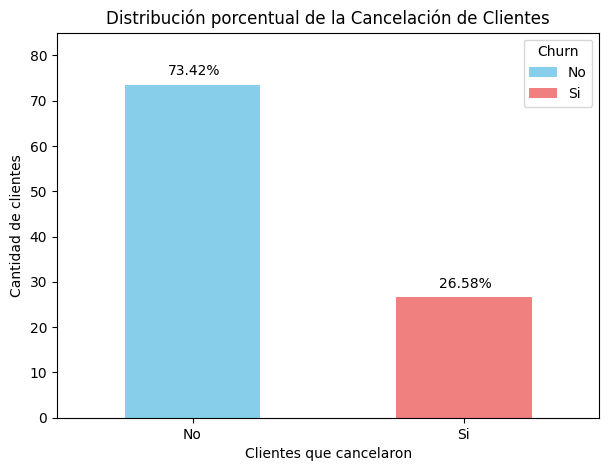

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Crear el gráfico de barras
plt.figure(figsize=(7,5))
ax = churn_porcentaje.plot(kind='bar', color=['skyblue', 'lightcoral'])

#
plt.title('Distribución porcentual de la Cancelación de Clientes')
plt.xlabel('Clientes que cancelaron')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.ylim(0,85)



# Añadir etiquetas de porcentaje en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1, 10), textcoords='offset points', fontsize=10)

# Elimina lineas de la cuadricula
ax.grid(False)


# Crear elementos de leyenda personalizados
legend_elements = [
    Patch(facecolor='skyblue', label='No'),
    Patch(facecolor='lightcoral', label='Si')
]

# Añadir la leyenda al gráfico
ax.legend(handles=legend_elements, title="Churn")


plt.show()

###Podemos observar que el porcentaje de Clientes que dejaron la Empresa Telecomx es un porcentaje significativo que amerita hacer un análisis exhaustivo.

2.1 Distribución de la Evasión por Variables Categóricas: **Género**


In [73]:
import plotly.express as px

In [74]:
genero_counts =df['genero'].value_counts()
genero_counts

,count
genero,
Masculino,3549
Femenino,3483


In [75]:
px.histogram(df, x='genero', text_auto=True, color='Churn', barmode='group').update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False
).show()

In [76]:
churn_genero = df.groupby('genero')['Churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2)
print(churn_genero)

Churn         No     Si
genero                 
Femenino   73.04  26.96
Masculino  73.80  26.20


<Figure size 1000x700 with 0 Axes>

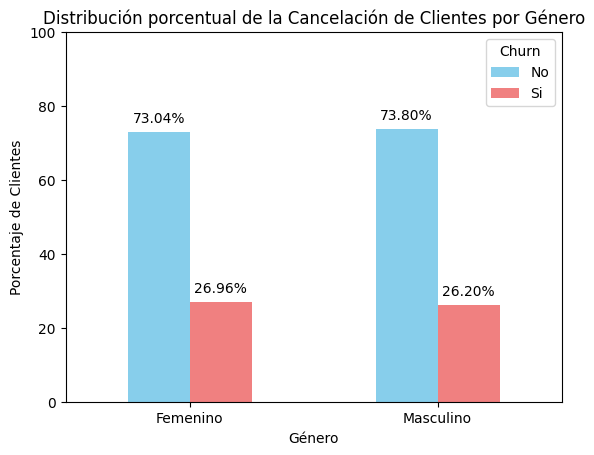

In [79]:
plt.figure(figsize=(10, 7))
ax = churn_genero.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribución porcentual de la Cancelación de Clientes por Género')
plt.xlabel('Género')
plt.ylabel('Porcentaje de Clientes')
plt.xticks(rotation=0)
plt.ylim(0, 100) # Establecer el límite del eje y para acomodar los porcentajes

# Añadir etiquetas de porcentaje en las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black',
                xytext=(0,5), textcoords='offset points')

# Elimina lineas de la cuadricula
ax.grid(False)


# Crear elementos de leyenda personalizados
legend_elements = [
    Patch(facecolor='skyblue', label='No'),
    Patch(facecolor='lightcoral', label='Si')
]

# Añadir la leyenda al gráfico
ax.legend(handles=legend_elements, title="Churn")

plt.show()

###Esta información no es tan relevante para nuestro análisis

2.2 Distribución de la Evasión por Variables Categóricas: **Tipo de Contrato**


In [80]:
tipo_contrato_counts =df['tipo_contrato'].value_counts()
tipo_contrato_counts

,count
tipo_contrato,
Mensual,3875
Bienal,1685
Anual,1472


In [81]:
px.histogram(df, x= 'tipo_contrato', text_auto=True, color='Churn', barmode='group').update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False
).show()

In [82]:
churn_tipo_contrato = df.groupby('tipo_contrato')['Churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2)
print(churn_tipo_contrato)

Churn             No     Si
tipo_contrato              
Anual          88.72  11.28
Bienal         97.15   2.85
Mensual        57.29  42.71


In [83]:
import plotly.graph_objects as go

# Crear un gráfico de barras apiladas con Plotly Go
fig = go.Figure()

for col in churn_tipo_contrato.columns:
    fig.add_trace(go.Bar(
        x=churn_tipo_contrato.index,
        y=churn_tipo_contrato[col],
        name=f'Churn: {col}'
    ))

fig.update_layout(
    barmode='stack',
    title='Distribución Porcentual de la Evasión de Clientes por Tipo de Contrato',
    xaxis_title='Tipo de Contrato',
    yaxis_title='Porcentaje de Clientes',
    yaxis=dict(range=[0, 100]) # Asegurar que el eje Y vaya de 0 a 100%
)

# Añadir etiquetas de texto a las barras
for i, contract_type in enumerate(churn_tipo_contrato.index):
    total_height = 0
    for col in churn_tipo_contrato.columns:
        value = churn_tipo_contrato.loc[contract_type, col]
        fig.add_annotation(
            x=contract_type,
            y=total_height + value / 2, # Posición en el centro de la sección de la barra
            text=f'{value:.2f}%',
            showarrow=False,
            font=dict(color='black', size=14)
        )
        total_height += value

fig.show()

In [84]:
px.violin(df, x='tipo_contrato', y='tiempo_contrato', color='Churn')

###Estos gráficos por Tipo de Contrato como: Mensual, Anual y Bienal,  nos permite observar que:

 * **El Contrato Mensual**: es el que más Clientes tenia con 3,875, y el que más abandono de clientes presenta con 1,655 que represntan, el 42.71%.

 * **El Contrato Anual**: tenia 1,306 clientes y presenta un abandono de Clientes de 166, que representa el 11.28%

 * **El Contrato Bienal**: tenia  1,685 clientes y presenta un abandono de Clientes de 48 clientes, que representa 2.85%

####Concluimos que los Clientes que tuvieron contrato Mensual, fueron los que más resincindieron contrato con la empresa Telecomx.




2.3 Distribución de la Evasión por Variables Categóricas:  **Tipo de Internet**

In [85]:
px.histogram(df, x ='tipo_internet', text_auto =True, color = 'Churn', barmode='group' )

In [86]:
churn_tipo_internet = df.groupby('tipo_internet')['Churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2)
print(churn_tipo_internet)

Churn             No     Si
tipo_internet              
DSL            81.00  19.00
Fiber optic    58.11  41.89
No             92.57   7.43


In [87]:

fig = px.bar(churn_tipo_internet,
             barmode='group',
             title='Distribución Porcentual de la Evasión por Tipo de Internet',
             labels={'value': 'Porcentaje de Clientes', 'tipo_internet': 'Tipo de Servicio de Internet'})

fig.update_layout(
    yaxis_title='Porcentaje de Clientes',
    xaxis_title='Tipo de Servicio de Internet',
    yaxis=dict(range=[0, 100]), # Asegurar que el eje Y vaya de 0 a 100%
    legend_title='Churn',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)



# Añadir etiquetas de texto a las barras para mostrar el porcentaje
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

fig.show()

###Este gráfico nos muestra que los clientes que tenian el Tipo de Servicio de Internet:
   * **Fiber Optic**: tenian 3,096 Clientes de los cuales presenta un abandono de Clientes de 1,297  que representa el 41.89%.
   * **DSL**: tenia 2,416 Clientes de los cuales presenta un abandono de Clientes de 459 que representa el 19%.
   * **No** : tenia  1,520 Clientes de los cuales presenta un abandono de Clientes de 113 que representa el 7.43%.
   
   
####Concluimos que los Clientes con el Tipo de Servicio de Internet con Fiber Optic, fueron los que más desertaron de la empresa TelecomX

In [88]:
px.box(df, x='tipo_internet', y='tiempo_contrato', color='Churn')

2.4- Distribución de la Evasión por Variables Categóricas:  **Metodo de Pago**

In [89]:
px.histogram(df, x = 'metodo_pago', text_auto = True, color = 'Churn', barmode = 'group')

In [90]:
churn_tipo_internet = df.groupby('metodo_pago')['Churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2)
print(churn_tipo_internet)

Churn                                   No     Si
metodo_pago                                      
Cheque electrónico                   54.71  45.29
Cheque enviado por correo            80.80  19.20
Tarjeta de crédito (automático)      84.75  15.25
Transferencia bancaria (automática)  83.27  16.73


In [91]:
fig = px.bar(churn_tipo_internet,
             barmode='group',
             title='Distribución Porcentual de la Evasión por Metodo de Pago',
             labels={'value': 'Porcentaje de Clientes', 'metodo_pago': 'Metodo de Pago'})

fig.update_layout(
    yaxis_title='Porcentaje de Clientes',
    xaxis_title='Método de Pago',
    yaxis=dict(range=[0, 100]), # Asegurar que el eje Y vaya de 0 a 100%
    legend_title='Churn',

    xaxis_showgrid=False,
    yaxis_showgrid=False
)

# Añadir etiquetas de texto a las barras para mostrar el porcentaje
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

fig.show()

###Este gráfico nos muestra que la Empresa TelecomX, tiene cuatro Metodos de Pagos:

* **Cheque Electronico**: tenia 2,365 Clientes delos cuales presenta un abandono de Clientes de 1,071 que representa el 45.29%.

* **Cheque enviado por Correo**: tenian 1,604 Clientes de los cuales presenta un abandono de Clientes de 308 que representa el 19.20%.

* **Transferencia Bancaria(automático)**: tenia 1,542 Clientes de los cuales presenta un abandono de Clientes de 258 que representa el 16.73%.

* **Tarjeta de Crédito(automática)**: tenia 1,521 Clientes de los cuales presenta un abandono de Clientes de 232 que representa el 15.25%.

####Concluimos que los Clientes que tienen el Metodo de Pago con Cheque Electronico son los que más  han cancelado el servicio con la empresa TelecomX

2.5 Distribución de la Evasión por Variable Categórica: **Adulto Mayor**

In [92]:
conteo_si_adulto_mayor= df['adulto_mayor'].value_counts().get('Si', 0)
print(f"Número de 'Si' en la columna 'adulto_mayor': {conteo_si_adulto_mayor}")

Número de 'Si' en la columna 'adulto_mayor': 1142


In [52]:
conteo_no_adulto_mayor = df['adulto_mayor'].value_counts().get('No', 0)
print(f"Número de 'No' en la columna 'adulto_mayor': {conteo_no_adulto_mayor}")

Número de 'No' en la columna 'adulto_mayor': 5890


In [93]:
px.histogram(df, x ='adulto_mayor', text_auto = True, color = 'Churn', barmode = 'group')

In [94]:
churn_adulto_mayor = df.groupby('adulto_mayor')['Churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2)
print(churn_adulto_mayor)

Churn            No     Si
adulto_mayor              
No            76.35  23.65
Si            58.32  41.68


In [95]:
fig = px.bar(churn_adulto_mayor,
             barmode='group',
             title='Distribución Porcentual de la Evasión por la categoria  Adulto Mayor',
             labels={'value': 'Porcentaje de Clientes', 'adulto_mayor': 'Adulto Mayor'})

fig.update_layout(
    yaxis_title='Porcentaje de Clientes',
    xaxis_title='Adulto Mayor',
    yaxis=dict(range=[0, 100]), # Asegurar que el eje Y vaya de 0 a 100%
    legend_title='Churn',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)

# Añadir etiquetas de texto a las barras para mostrar el porcentaje
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

fig.show()


###Podemos observar en este gráfico, que la empresa cuenta con clientes que son:

* **Adulto Mayor (mayor 65 años)**:  Tenia 1,142 clientes, de los cuales presenta un abandono de clientes de 476, que representa el 41.68%

* **No Adulto Mayor**:  Tenia 5,890 Clientes, de los cuales presenta un abandono de Clientes de 1,393 que representa el 23.65%.

####**Concluimos**: Que aunque los adultos mayores tienen una mayor propensión a irse, la mayor parte de los clientes que abandonan el servicio no son adultos mayores, simplemente porque este grupo es mucho más grande en nuestra base de datos.

####Ambas perspectivas son valiosas: el porcentaje nos muestra la tasa de riesgo en cada grupo, y el número absoluto nos indica el impacto total en la pérdida de clientes por cada grupo.




2.6 Distribución de la Evasión por Variable Categórica:  **Tienen  Pareja**

In [96]:
df['tienen_pareja'].value_counts()


,count
tienen_pareja,
No,3639
Si,3393


In [97]:
px.histogram(df, x = 'tienen_pareja', text_auto = True, color = 'Churn', barmode = 'group')

In [98]:
churn_tienen_pareja = df.groupby('tienen_pareja')['Churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2)
print(churn_tienen_pareja)

Churn             No     Si
tienen_pareja              
No             67.02  32.98
Si             80.28  19.72


In [99]:
fig = px.bar(churn_tienen_pareja,
             barmode='group',
             title='Distribución Porcentual de la Evasión por la categoria  Tienen Pareja',
             labels={'value': 'Porcentaje de Clientes', 'tienen_pareja': 'Tienen Pareja'})

fig.update_layout(
    yaxis_title='Porcentaje de Clientes',
    xaxis_title='tienen Pareja',
    yaxis=dict(range=[0, 100]), # Asegurar que el eje Y vaya de 0 a 100%
    legend_title='Churn',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)

# Añadir etiquetas de texto a las barras para mostrar el porcentaje
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

fig.show()

###Podemos observar que la empresa cuenta con Clientes que:

* **Tienen Pareja**: son 3,393 Clientes, de los cuales han abandonado 669 Clientes, que representa el 19.72%.
* **No Tienen Pareja (solteros)**: son 3,639 Clientes, de los cuales han abandonado 1,200 Clientes, que representa el 32.98%

####Concluimos que la empresa, tenia más Clientes Solteros(que no tienen pareja) y estos son los que más han abandonado la empresa TelecomX.

2.7 Distribución de la Evasión por Variable Categórica:  **Tienen Dependientes**

In [100]:
df['tienen_dependientes'].value_counts()

,count
tienen_dependientes,
No,4933
Si,2099


In [101]:
fig =  px.histogram(df, x = 'tienen_dependientes', text_auto = True, color = 'Churn', barmode = 'group')
# Eliminar el ancho de la linea del borde del marcador
fig.update_traces(marker_line_width=0)
# Esto quita las lineas blancas del fondo (la cuadricula)
fig.update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False
)
fig.show()

In [102]:
churn_tienen_dependientes = df.groupby('tienen_dependientes')['Churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2)
print(churn_tienen_dependientes)

Churn                   No     Si
tienen_dependientes              
No                   68.72  31.28
Si                   84.47  15.53


In [103]:
fig = px.bar(churn_tienen_dependientes,
             barmode='group',
             title='Distribución Porcentual de la Evasión por la categoria  Tienen Dependientes',
             labels={'value': 'Porcentaje de Clientes', 'tienen_dependientes': 'Tienen Dependientes'})

fig.update_layout(
    yaxis_title='Porcentaje de Clientes',
    xaxis_title='Tienen Dependientes',
    yaxis=dict(range=[0, 100]), # Asegurar que el eje Y vaya de 0 a 100%
    legend_title='Churn'
)

# Añadir etiquetas de texto a las barras para mostrar el porcentaje
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

fig.show()



###La empresa TelecomX cuenta con Clientes que:

* **Tienen Dependientes**: Tenia  2,099 Clientes, de los cuales han abandonado 326 Clientes, que representa el 15.53%.

* **No Tienen Dependientes**: Tenia  4,933 Clientes, de los cuales han abandonado 1,543 Clientes, que representa el 31.28%.

####Concluimos que la empresa, tenia más Clientes que No Tenian Dependientes y estos son los que más han abandonado la empresa TelecomX.


3.-Distribución de la Evasión por **Variables Numéricas**

3.1 **Relación Tiempo contrato - Churn**

In [68]:
churn_tiempo_contrato = df.groupby('tiempo_contrato')['Churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2)
print(churn_tiempo_contrato)

Churn               No     Si
tiempo_contrato              
1                38.01  61.99
2                48.32  51.68
3                53.00  47.00
4                52.84  47.16
5                51.88  48.12
...                ...    ...
68               91.00   9.00
69               91.58   8.42
70               90.76   9.24
71               96.47   3.53
72               98.34   1.66

[72 rows x 2 columns]


In [ ]:
fig = px.bar(churn_tiempo_contrato,
             barmode='group',
             title='Distribución Porcentual de la Evasión por la categoria Tiempo Contrato',
             labels={'value': 'Porcentaje de Clientes', 'tiempo_contrato': 'Tiempo Contrato'})

fig.update_layout(
    yaxis_title='Porcentaje de Clientes',
    xaxis_title='Tiempo Contrato',
    yaxis=dict(range=[0, 100]), # Asegurar que el eje Y vaya de 0 a 100%
    legend_title='Churn'
)

# Añadir etiquetas de texto a las barras para mostrar el porcentaje
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

fig.show()

###El **primer mes** es donde más se producen la cancelación de los servicios de la empresa Telecomx

3.2-**Relación Cargo Mensual - Churn** / **Relación Cargo Total - Churn**

In [107]:
import plotly.express as px

# Box plot para 'cargo_mensual' por Churn
fig_mensual = px.box(df, y='cargo_mensual', color='Churn',
                     title='Distribución de Cargo Mensual por Evasión de Clientes',
                     labels={'cargo_mensual': 'Cargo Mensual', 'Churn': 'Evasión'})
fig_mensual.show()


# Box plot para 'cargo_total' por Churn
fig_total = px.box(df, y='cargo_total', color='Churn',
                   title='Distribución de Cargo Total por Evasión de Clientes',
                   labels={'cargo_total': 'Cargo Total', 'Churn': 'Evasión'})
fig_total.show()

In [109]:
# Gráfico de dispersión: Cargo Mensual vs. Antigüedad
fig_scatter = px.scatter(df,
                         x='tiempo_contrato',           # Antigüedad (tiempo)
                         y='cargo_mensual',    # Dinero al mes
                         color='Churn',        # Color según si se fue o no
                         title='¿Influye el precio y el tiempo en que un cliente se vaya?',
                         labels={'tiempo_contrato': 'Meses en la empresa', 'cargo_mensual': 'Cargo Mensual'},
                         trendline="ols")      # Una línea mágica que nos dice la tendencia
fig_scatter.show()

In [ ]:
# Gráfico de dispersión: Cargo Total vs. Antigüedad
fig_scatter = px.scatter(df,
                         x='tiempo_contrato',           # Antigüedad (tiempo)
                         y='cargo_total',    # Dinero durante todo el tiempo de contrato
                         color='Churn',        # Color según si se fue o no
                         title='¿Influye el precio y el tiempo en que un cliente se vaya?',
                         labels={'tiempo_contrato': 'Meses en la empresa', 'cargo_total': 'Cargo Total'},
                         trendline="ols")      # Una línea mágica que nos dice la tendencia
fig_scatter.show()

###Notamos que en el gráfico de relación de Cargos Mensuales - Churn que, los Clientes que abandonan son Nuevos y suelen tener facturas mensuales más caras.
####**Esto es una señal clara que el precio mensual influye en la pérdida de clientes**.

###En el gráfico de relación de Cargos Totales - Churn que, los clientes que cancelan tienden a tener un 'Cargo Total' más bajo en comparación con los que se quedan. Esto podría indicar que se van más temprano en su ciclo de vida con la empresa, antes de acumular un gasto total elevado.

###Análisis Opcional


**La relación entre la Cuenta Diaria y la Evasión**.

In [119]:
px.histogram(df, x='cuentas_diarias', text_auto=True, color='Churn', barmode='group').update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False
).show()

In [120]:
px.histogram(df, x='cuentas_diarias', color='Churn', barmode='group', histnorm='percent')

In [117]:
# Esto mostrará la proporción (densidad) en lugar del conteo bruto
px.histogram(df, x='cuentas_diarias', color='Churn', barmode='group',
             histnorm='percent', text_auto='.1f')

###Podemos observar que los Clientes se van cuando tienen contratos más caros


In [114]:
churn_cuenta_diaria = df.groupby('cuentas_diarias')['Churn'].value_counts(normalize=True)
print(churn_cuenta_diaria)

cuentas_diarias  Churn
0.608333         No       1.0
0.613333         No       1.0
0.618333         No       1.0
0.623333         No       1.0
0.625000         No       1.0
                         ... 
3.940000         No       1.0
3.945000         Si       1.0
3.953333         No       1.0
3.955000         No       1.0
3.958333         No       1.0
Name: proportion, Length: 2369, dtype: float64


###Para saber como la Cantidad de Servicios afecta a Churn(la deserción del cliente)

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Definimos las columnas que representan servicios adicionales
servicios = [
    'servicio_telefono', 'multiples_lineas','tipo_internet', 'seguridad_online',
    'backup_online', 'proteccion_dispositivo', 'soporte_tecnico',
    'streaming_tv', 'streaming_peliculas'
]

# Convertimos a 1 si tiene el servicio y a 0 si no (ajusta los valores según tu dataset)
# Usualmente los valores son 'Si', 'No' o 'Sin servicio de internet'
def contar_servicios(row):
    conteo = 0
    for col in servicios:
        if row[col] == 'Si':
            conteo += 1
    return conteo

df['total_servicios'] = df.apply(contar_servicios, axis=1)

# Convertir la columna Churn a numérica para calcular la tasa (Si=1, No=0)
df['Churn_num'] = df['Churn'].map({'Si': 1, 'No': 0})


/tmp/ipython-input-1095784370.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




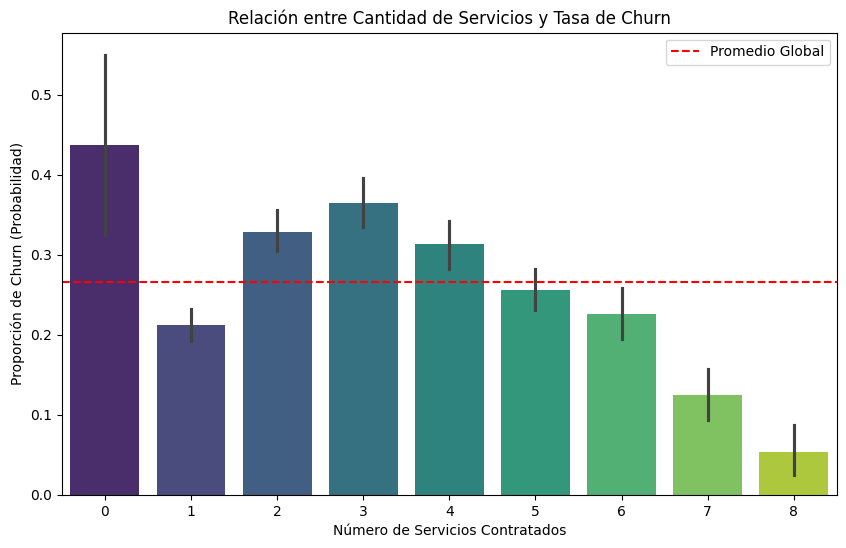

In [111]:
plt.figure(figsize=(10, 6))
sns.barplot(x='total_servicios', y='Churn_num', data=df, palette='viridis')

plt.title('Relación entre Cantidad de Servicios y Tasa de Churn')
plt.xlabel('Número de Servicios Contratados')
plt.ylabel('Proporción de Churn (Probabilidad)')
plt.axhline(df['Churn_num'].mean(), color='red', linestyle='--', label='Promedio Global')
plt.legend()
plt.show()

Es un Gráfico de Barras que muestra la Relación entre la Cantidad de Servicios Contratados y la Tasa de Churn (abandono).

Eje X ('Número de Servicios Contratados'): Aquí ves los diferentes recuentos de servicios que un cliente puede tener (por ejemplo, 0, 1, 2, 3, etc.).
Eje Y ('Proporción de Churn (Probabilidad)'): Este eje te dice la probabilidad o la proporción de clientes que cancelan el servicio para cada cantidad de servicios contratados. Un valor de 0.2, por ejemplo, significa que el 20% de los clientes con esa cantidad de servicios tienden a cancelar.
Las Barras: Cada barra representa un número específico de servicios contratados. La altura de la barra te muestra la tasa de Churn para los clientes que tienen esa cantidad de servicios.
Línea Roja Discontinua ('Promedio Global'): Esta línea es muy importante. Indica la tasa de Churn promedio de todos los clientes en tu conjunto de datos. Es un punto de referencia para saber si un grupo en particular está por encima o por debajo de la media.
¿Cómo lo interpretamos de forma didáctica?
Observa la Altura de las Barras en Relación con la Línea Roja:

Barras por encima de la línea roja: Si una barra está más alta que la línea roja, significa que los clientes con esa cantidad de servicios tienen una mayor probabilidad de cancelar en comparación con el promedio general.
Barras por debajo de la línea roja: Si una barra está por debajo de la línea roja, indica que los clientes con esa cantidad de servicios tienen una menor probabilidad de cancelar que el promedio.
Identifica Patrones:

¿La tasa de Churn aumenta o disminuye a medida que los clientes contratan más servicios? Por ejemplo, si las barras son altas para pocos servicios y bajan para más servicios, podría significar que los clientes que solo tienen lo básico son más propensos a irse. O lo contrario, si hay muchos servicios la gente se siente abrumada o el costo es muy alto.
¿Hay algún 'punto óptimo' o 'punto de inflexión'? Quizás los clientes con 2 o 3 servicios son los más satisfechos y tienen la tasa de Churn más baja.
En resumen, este gráfico te ayuda a responder la pregunta: '¿Los clientes que contratan más (o menos) servicios son más propensos a irse?' Si la tasa de Churn es significativamente más alta para un número bajo de servicios, podría indicar que estos clientes no encuentran suficiente valor en el servicio básico. Si es más alta para un número muy alto de servicios, podría sugerir problemas de complejidad o costo para esos clientes.



In [72]:
correlacion = df['total_servicios'].corr(df['Churn_num'])
print(f"La correlación entre cantidad de servicios y churn es: {correlacion:.4f}")

La correlación entre cantidad de servicios y churn es: -0.0675


In [ ]:
df.corr(numeric_only=True)

,tiempo_contrato,cargo_mensual,cargo_total,cuentas_diarias,total_servicios,Churn_num
tiempo_contrato,1.000000,0.246862,0.825880,0.246862,0.524441,-0.354049
cargo_mensual,0.246862,1.000000,0.651065,1.000000,0.802368,0.192858
cargo_total,0.825880,0.651065,1.000000,0.651065,0.796885,-0.199484
cuentas_diarias,0.246862,1.000000,0.651065,1.000000,0.802368,0.192858
total_servicios,0.524441,0.802368,0.796885,0.802368,1.000000,-0.067459
Churn_num,-0.354049,0.192858,-0.199484,0.192858,-0.067459,1.000000


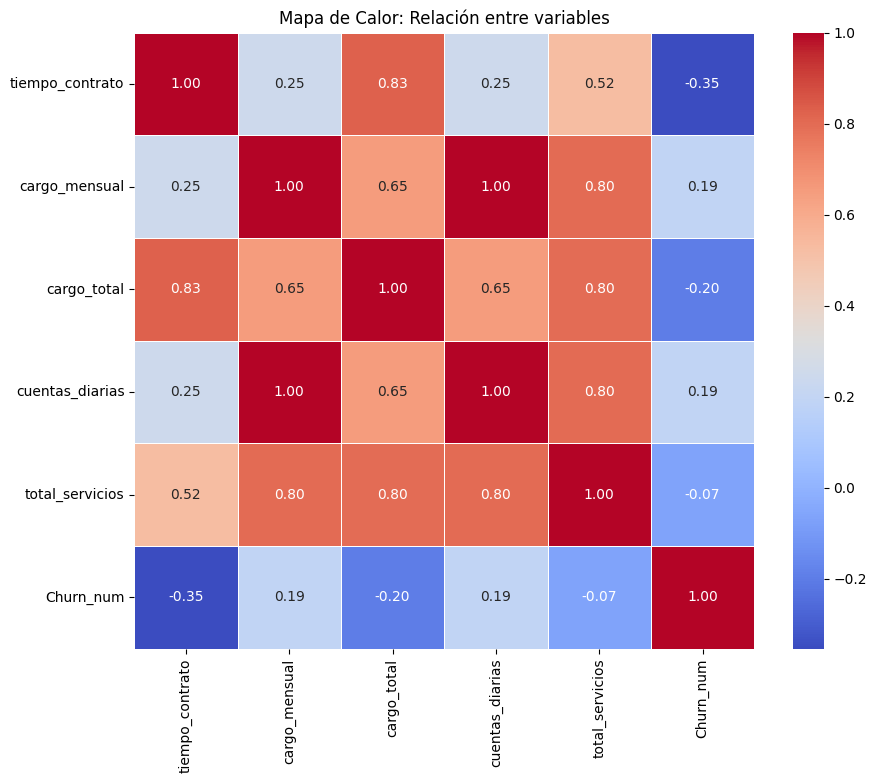

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Creamos el mapa de calor, excluyendo columnas no numéricas de la correlación
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Mapa de Calor: Relación entre variables')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(df,
                 x="cargo_mensual",
                 y="cargo_total",
                 color="Churn",
                 size="tiempo_contrato", # El tamaño del punto indica la antigüedad
                 hover_data=['tiempo_contrato'],
                 title="Relación: Mensual vs Total (El tamaño es la antigüedad)",
                 labels={'cargo_mensual': 'Pago al Mes', 'cargo_total': 'Pago Acumulado'},
                 template="plotly_white")

fig.show()

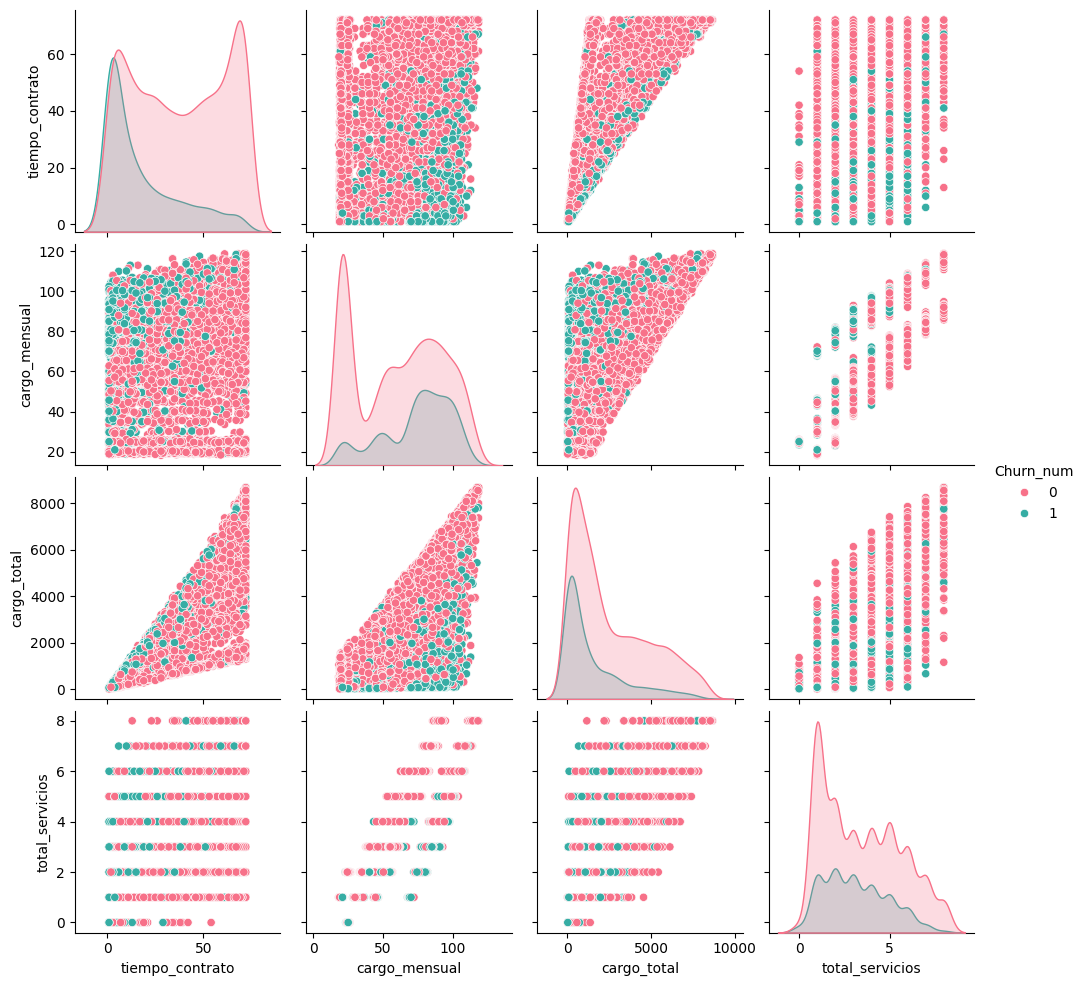

In [ ]:
# Filtramos solo las columnas numéricas importantes para no saturar el gráfico
cols_interes = ['tiempo_contrato', 'cargo_mensual', 'cargo_total', 'total_servicios', 'Churn_num']

sns.pairplot(df[cols_interes], hue='Churn_num', palette='husl', diag_kind='kde')
plt.show()

#📄Informe final